**Heteroscedasticity**

***Definition:***
Heteroscedasticity occurs when the variance of residuals is not constant across fitted values.
(i.e., the spread of errors changes with predicted values.)









**Example:** plotting household food expenditure against income.
      (1) The residuals will be smaller for lower-income households (their  spending is more predictable).
      (2) The residuals will be larger for higher-income households (their spending is more variable).


**Understanding the plot:**
      (1) No heteroscedasticity: If there were no heteroscedasticity, the points would be randomly scattered around a horizontal line at zero, with a constant vertical spread across the plot.
      (2) With heteroscedasticity: With heteroscedasticity, the points will form a pattern like a fan or cone, where the vertical spread of the points increases as the fitted values increase.



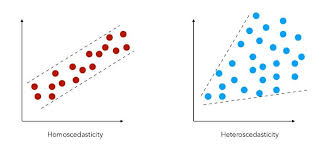



**Consequences of heteroscedasticity**



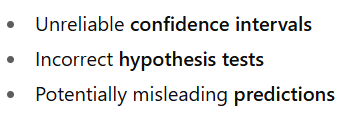

**The methods to detect heteroscedasticity are: **

  **a. Visual methods**

      1. Residual plot (residuals vs. fitted values)

      2. Plot of residuals vs. independent variable

      3. Scale-Location plot (spread-location plot)

      4. QQ plot of residuals


  **b. Statistical tests**

      1. Breusch-Pagan test

      2. White test

      3. Goldfeld-Quandt test

      4. Park test

      5. Glejser test

      6. Harvey-Collier test

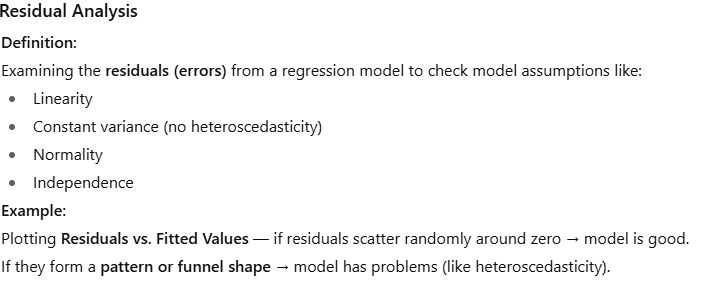

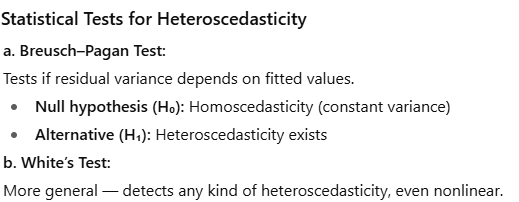

If ***p-value < 0.05***, → heteroscedasticity present.

**Question**

**Heteroscedasticity and Autocorrelation:**

i. Fit a linear regression model for the given dataset
(Hypothetical Data on Consumption Expenditure Y ($) and
Income X ($))

ii. Perform residual analysis and check for the presence of
heteroskedasticity in the data.

iii. Conduct statistical tests (Breusch-Pagan test and White test)
for conforming heteroskedasticity.

iv. Plot the residuals against time (for time-series data) or
against the independent variable (for cross-sectional data),
and visualize the ACF plot. Them, apply the Durbin-Watson
test to conform the presence of autocorrelation.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#### Hypothetical Data
data = {
    "Income": [50, 55, 60, 65, 70, 75, 80, 85, 90, 95,60, 65, 70, 75, 80, 85, 90, 95],
    "Consumption": [30, 35, 36, 38, 40, 43, 45, 46, 48, 50, 35, 36, 38, 40, 43, 45, 46, 48]
}
df = pd.DataFrame(data)

##### (i) Fitting a Linear Regression Model
X = sm.add_constant(df['Income'])  # Adding constant for intercept
y = df['Consumption']
model = sm.OLS(y, X).fit()

print("Regression Summary:")
print(model.summary())

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     370.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.72e-12
Time:                        06:03:37   Log-Likelihood:                -27.338
No. Observations:                  18   AIC:                             58.68
Df Residuals:                      16   BIC:                             60.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5265      1.567

(ii) Residual Analysis



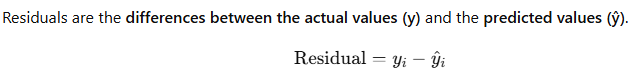



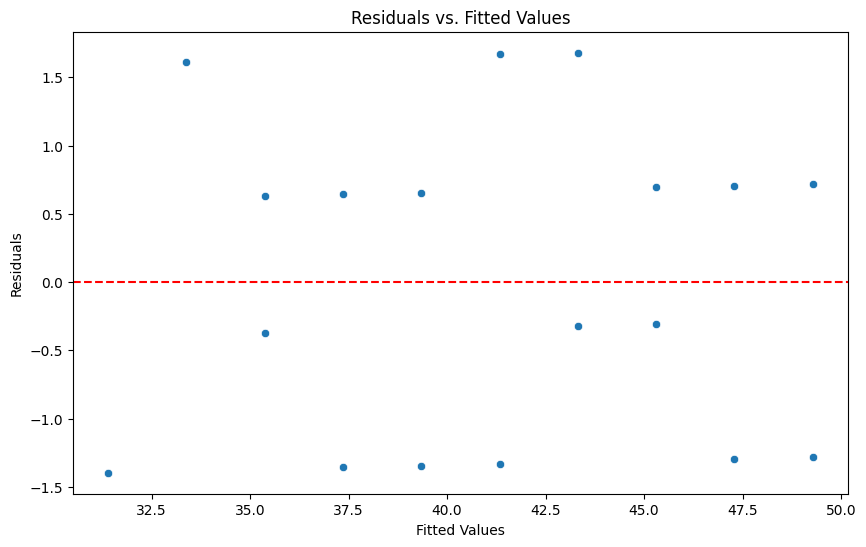

In [ ]:
##### (ii) Residual Analysis
residuals = model.resid
fitted_values = model.fittedvalues  #### these are values of y^i that your regression model predicts for each observation #####

# Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

Clearly there is no evident pattern that can be observed and the spread of the residuals remains constant across the range of predicted values, it suggests that there is no significant heteroskedasticity in the data.

However, if the spread of the residuals increases or decreases as the predicted values change, it indicates the presence of heteroskedasticity.

In [ ]:
##### (iii) Perform Breusch-Pagan Test and White Test
bp_test = het_breuschpagan(residuals, X)
white_test = het_white(residuals, X)

print("\nBreusch-Pagan Test Results:")
print(f"Lagrange multiplier statistic: {bp_test[0]}, p-value: {bp_test[1]}")

print("\nWhite Test Results:")
print(f"Lagrange multiplier statistic: {white_test[0]}, p-value: {white_test[1]}")


Breusch-Pagan Test Results:
Lagrange multiplier statistic: 0.5696661094833022, p-value: 0.4503916260804016

White Test Results:
Lagrange multiplier statistic: 0.6035763315751415, p-value: 0.7394946985758278


**Any one Test can be applied**

Based on the p-value obtained, both the values are greater than the level of significance alpha = 0.05, therefore we accept the null hypothesis of Homoskedasticity

Note : Here the null hypothesis is

H_0 : Error variance is Homoskedastic

H_1 : Error variance is not Homoskedastic

**Conclusion based on p - value in general :**
**The lesser the p - value than alpha (0.05) gives a stronger reason to reject null hypothesis.**

**ACF (Autocorrelation Function)**




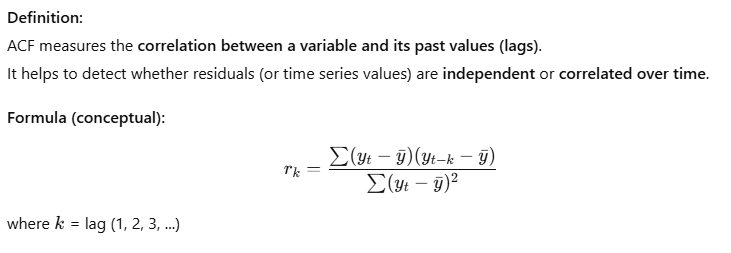




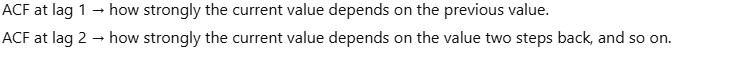


**PACF (Partial Autocorrelation Function)**


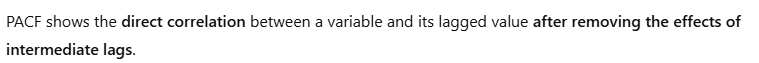



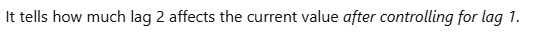




**Interpretation of ACF and PACF plots**


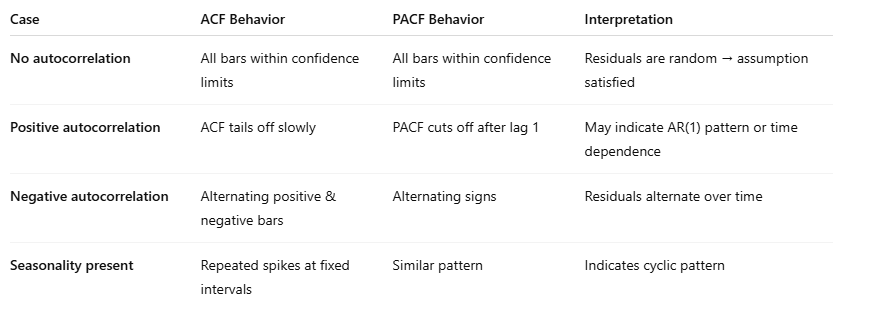

<Figure size 1000x600 with 0 Axes>

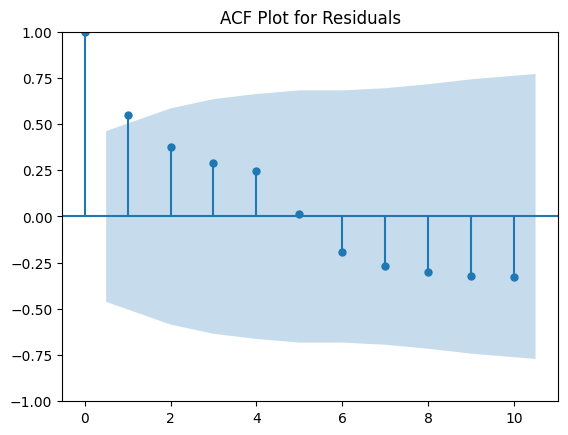

<Figure size 1000x600 with 0 Axes>

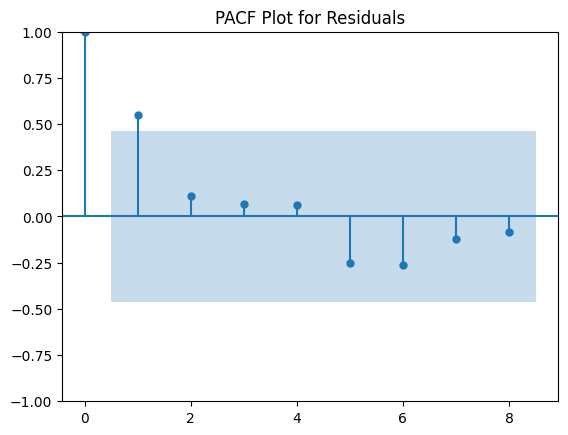

In [ ]:
##### (iv) ACF Plot for Residuals
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=10)
plt.title("ACF Plot for Residuals")
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 6))
plot_pacf(residuals, lags=8)
plt.title("PACF Plot for Residuals")
plt.show()

**Observation from the ACF plot**

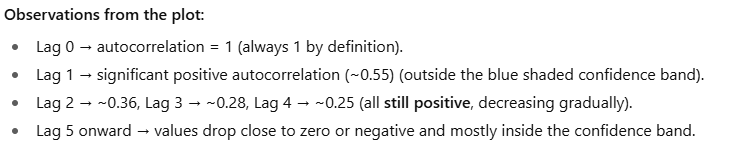



**Observation from PACF plot**


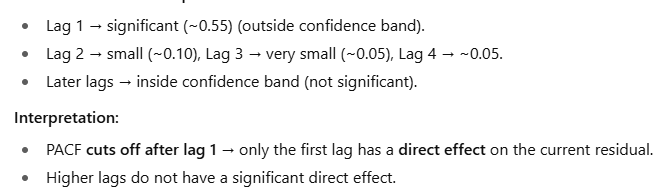

Observing the ACF and PACF Graphs we can conclude that since ACF decays and PACF cuts off at 1

**Durbin-Watson test**

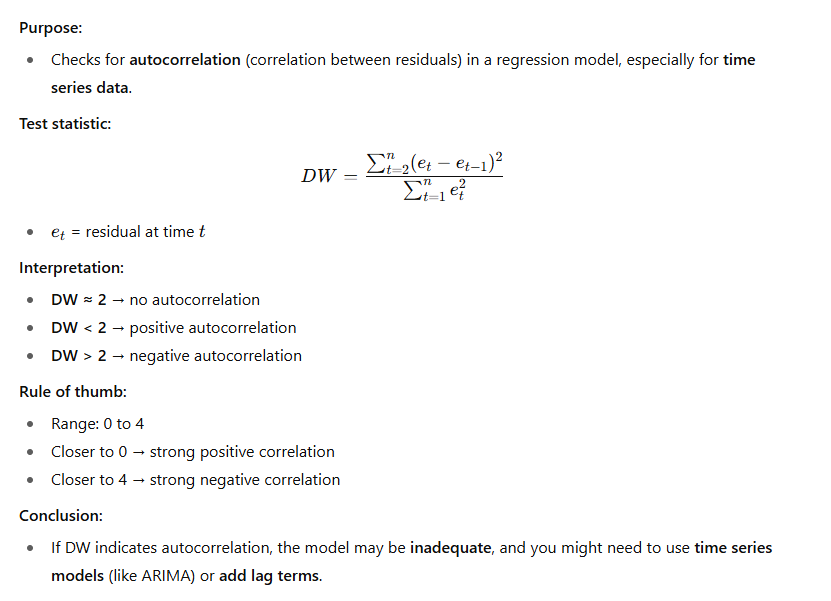

In [ ]:
#### Durbin-Watson Test for Autocorrelation
dw_stat = durbin_watson(residuals)
print("\nDurbin-Watson Test Statistic:", dw_stat)


Durbin-Watson Test Statistic: 0.7378892153447555


Here the Durbin Watson Test statistic is 0.737 which is less than 2, indicating positive correlation.